In [215]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [216]:
# read csv file and convert into dataframe
df = pd.read_csv("grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


### Observations about dataset
Firstly, we explore the students grades dataset

- The dataset contains grades scored by students throughout their university.
- CGPA is calculated based on grades.
- we have  toatl 43 columns.
- Seat No : The enrolled number of candidate that took the exams.
- CGPA : The cumulative GPA based on the four year total grade progress of each candidate .CGPA is a Final Marks provided to            student.
- All other columns are course codes where AB are alphabets representing candidates' departments and numbers where first digit   represents the year of the canditate took exam.

In [217]:
# let's check the shape of this dataset
df.shape

(571, 43)

### We have 571 rows and 43 columns

In [218]:
# let's check the unique values of all columns
df.nunique()


Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [219]:
# summary about all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

### all columns are having object datatype except CGPA,we need to convert into numbers so we have to use encoding techniques to handle the data

In [220]:
# let's drop the unnecessay columns from dataset
df.drop('Seat No.',axis = 1,inplace = True)

## treating with nulls

In [221]:
# filling missing values with most common value appearing in the dataset
df_i = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [222]:
# let's check the null values
df_i.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

### Now , there is no null value present

In [223]:
# let's reset the index after treating with nulls
df_i.reset_index(drop=True,inplace=True)

In [224]:
# For convenience and modeling , converting categorical values into numerical order
for column in df_i.columns:
    
    df_i[column]=df_i[column].replace('A+',4.0)
    df_i[column]=df_i[column].replace('A',4.0)
    df_i[column]=df_i[column].replace('A-',3.7)
    df_i[column]=df_i[column].replace('B+',3.4)
    df_i[column]=df_i[column].replace('B',3.0)
    df_i[column]=df_i[column].replace('B-',2.7)
    df_i[column]=df_i[column].replace('C+',2.4)
    df_i[column]=df_i[column].replace('C',2.0)
    df_i[column]=df_i[column].replace('C-',1.7)
    df_i[column]=df_i[column].replace('D+',1.4)
    df_i[column]=df_i[column].replace('D',1.0)

In [225]:
df_i

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [269]:
###Data cleaning replacing WU,W,F and I for cleaned Dataset
df_i['HS-101'].replace({'F':0},inplace = True)
df_i['CY-105'].replace({'WU':0,'F':0},inplace = True)
df_i['HS-105/12'].replace({'WU':0,'F':0},inplace = True)
df_i['MT-111'].replace({'WU':0,'F':0},inplace = True)
df_i['CS-106'].replace({'WU':0,'F':0},inplace = True)
df_i['EL-102'].replace({'WU':0,'F':0},inplace = True)
df_i['EE-119'].replace({'WU':0},inplace = True)
df_i['ME-107'].replace({'WU':0,'F':0},inplace = True)
df_i['CS-107'].replace({'WU':0,'F':0,'I':0},inplace = True)
df_i['HS-205/20'].replace({'WU':0,'F':0},inplace = True)
df_i['MT-222'].replace({'WU':0,'F':0,'W':0},inplace = True)
df_i['EE-222'].replace({'F':0,'W':0},inplace = True)
df_i['MT-224'].replace({'WU':0,'F':0,'W':0},inplace = True)
df_i['CS-210'].replace({'WU':0,'F':0,'W':0},inplace = True)
df_i['CS-211'].replace({'WU':0,'F':0,'W':0},inplace = True)
df_i['CS-203'].replace({'I':0,'F':0},inplace = True)
df_i['CS-214'].replace({'F':0,'I':0},inplace = True)
df_i['EE-217'].replace({'WU':0,'F':0},inplace = True)
df_i['CS-212'].replace({'WU':0},inplace = True)
df_i['CS-215'].replace({'W':0,'F':0,'WU':0},inplace = True)
df_i['MT-331'].replace({'F':0},inplace = True)
df_i['EF-303'].replace({'WU':0,'F':0},inplace = True)
df_i['HS-304'].replace({'W':0,'F':0,'WU':0},inplace = True)
df_i['CS-301'].replace({'F':0},inplace = True)
df_i['TC-383'].replace({'F':0},inplace = True)
df_i['MT-442'].replace({'F':0},inplace = True)
df_i['EL-332'].replace({'WU':0,'F':0},inplace = True)
df_i['CS-318'].replace({'W':0,'F':0,'WU':0},inplace = True)
df_i['CS-306'].replace({'WU':0,'F':0},inplace = True)
df_i['CS-312'].replace({'W':0,'F':0,'WU':0},inplace = True)
df_i['CS-317'].replace({'F':0},inplace = True)
df_i['CS-421'].replace({'W':0,'F':0},inplace = True)
df_i['CS-406'].replace({'W':0,'F':0,'WU':0},inplace = True)
df_i['CS-423'].replace({'W':0,'F':0},inplace = True)
df_i['CS-414'].replace({'W':0,'F':0},inplace = True)
df_i['CS-419'].replace({'F':0},inplace = True)
df_i['CS-412'].replace({'W':0,'F':0},inplace = True)
df_i['PH-121'].replace({'WU':0,'F':0},inplace = True)

In [270]:
# let's check the null values
df_i.isnull().any()

PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
MT-442       False
EL-332       False
CS-318       False
CS-306       False
CS-312       False
CS-317       False
CS-403       False
CS-421       False
CS-406       False
CS-414       False
CS-419       False
CS-423       False
CS-412       False
CGPA         False
dtype: bool

In [271]:
df_i.shape

(571, 42)

In [272]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df_i[df_i.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PH-121, HS-101, CY-105, HS-105/12, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205/20, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA]
Index: []

[0 rows x 42 columns]


### There is no duplicates present in this dataset

In [273]:
df_i.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.269702,2.885989,3.001051,3.329247,2.974956,2.982837,3.033100,2.711559,...,2.962347,2.707881,3.152890,2.514011,3.322942,3.440806,3.047811,2.997023,3.306130,2.954888
std,0.971594,0.908402,0.923424,1.013114,0.938643,0.799826,0.852357,0.966665,0.821065,1.018482,...,1.034341,0.869497,0.852533,0.908003,0.788436,0.767565,0.739991,0.880316,0.749513,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.850000,2.000000,2.400000,3.000000,2.700000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.200000,2.700000,2.400000,3.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [274]:
df_i.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.403916,0.634998,0.542404,0.491448,0.670488,0.294662,0.430898,0.653517,0.560114,...,0.017554,0.488370,0.322690,0.332941,0.273677,0.181826,0.434388,0.081660,0.231122,0.678066
HS-101,0.403916,1.000000,0.347955,0.484764,0.449556,0.432621,0.361570,0.364790,0.309038,0.352839,...,0.221540,0.409697,0.243646,0.340108,0.309811,0.271739,0.283499,0.240377,0.249635,0.562432
CY-105,0.634998,0.347955,1.000000,0.592358,0.572744,0.615777,0.404415,0.482410,0.536023,0.462786,...,0.223884,0.474775,0.465345,0.352003,0.138621,0.056944,0.421307,0.101452,0.032283,0.671831
HS-105/12,0.542404,0.484764,0.592358,1.000000,0.532648,0.527830,0.522210,0.377415,0.457887,0.378209,...,0.284224,0.503937,0.494668,0.430843,0.194099,0.127730,0.467260,0.236596,0.136358,0.659114
MT-111,0.491448,0.449556,0.572744,0.532648,1.000000,0.426058,0.543480,0.573076,0.441939,0.483733,...,0.466358,0.570492,0.411811,0.525131,0.276972,0.234948,0.499176,0.380456,0.257067,0.743227
CS-105,0.670488,0.432621,0.615777,0.527830,0.426058,1.000000,0.283559,0.357784,0.586035,0.480496,...,0.046015,0.397065,0.268677,0.269026,0.239135,0.152510,0.317141,0.044027,0.156766,0.627746
CS-106,0.294662,0.361570,0.404415,0.522210,0.543480,0.283559,1.000000,0.356170,0.263301,0.298441,...,0.480554,0.418149,0.458734,0.408368,0.144621,0.100997,0.440097,0.359455,0.146583,0.571756
EL-102,0.430898,0.364790,0.482410,0.377415,0.573076,0.357784,0.356170,1.000000,0.433956,0.457914,...,0.298903,0.462369,0.294667,0.362650,0.261229,0.268769,0.347477,0.345015,0.248196,0.642577
EE-119,0.653517,0.309038,0.536023,0.457887,0.441939,0.586035,0.263301,0.433956,1.000000,0.606331,...,0.156176,0.474334,0.359758,0.390103,0.279562,0.227848,0.471286,0.232640,0.278536,0.664733
ME-107,0.560114,0.352839,0.462786,0.378209,0.483733,0.480496,0.298441,0.457914,0.606331,1.000000,...,0.220441,0.480350,0.338356,0.404015,0.303483,0.170514,0.451417,0.225025,0.255056,0.681464


In [275]:
# let's check the correation with CGPA
df_i.corr()['CGPA'].sort_values

<bound method Series.sort_values of PH-121       0.678066
HS-101       0.562432
CY-105       0.671831
HS-105/12    0.659114
MT-111       0.743227
CS-105       0.627746
CS-106       0.571756
EL-102       0.642577
EE-119       0.664733
ME-107       0.681464
CS-107       0.626707
HS-205/20    0.484205
MT-222       0.670533
EE-222       0.570320
MT-224       0.701489
CS-210       0.777480
CS-211       0.660199
CS-203       0.658334
CS-214       0.768787
EE-217       0.676483
CS-212       0.684978
CS-215       0.753141
MT-331       0.514984
EF-303       0.536809
HS-304       0.577285
CS-301       0.698290
CS-302       0.704748
TC-383       0.598895
MT-442       0.582635
EL-332       0.733265
CS-318       0.563025
CS-306       0.711191
CS-312       0.481848
CS-317       0.785866
CS-403       0.560895
CS-421       0.682586
CS-406       0.467174
CS-414       0.389603
CS-419       0.653644
CS-423       0.523046
CS-412       0.438741
CGPA         1.000000
Name: CGPA, dtype: float64>

<AxesSubplot:>

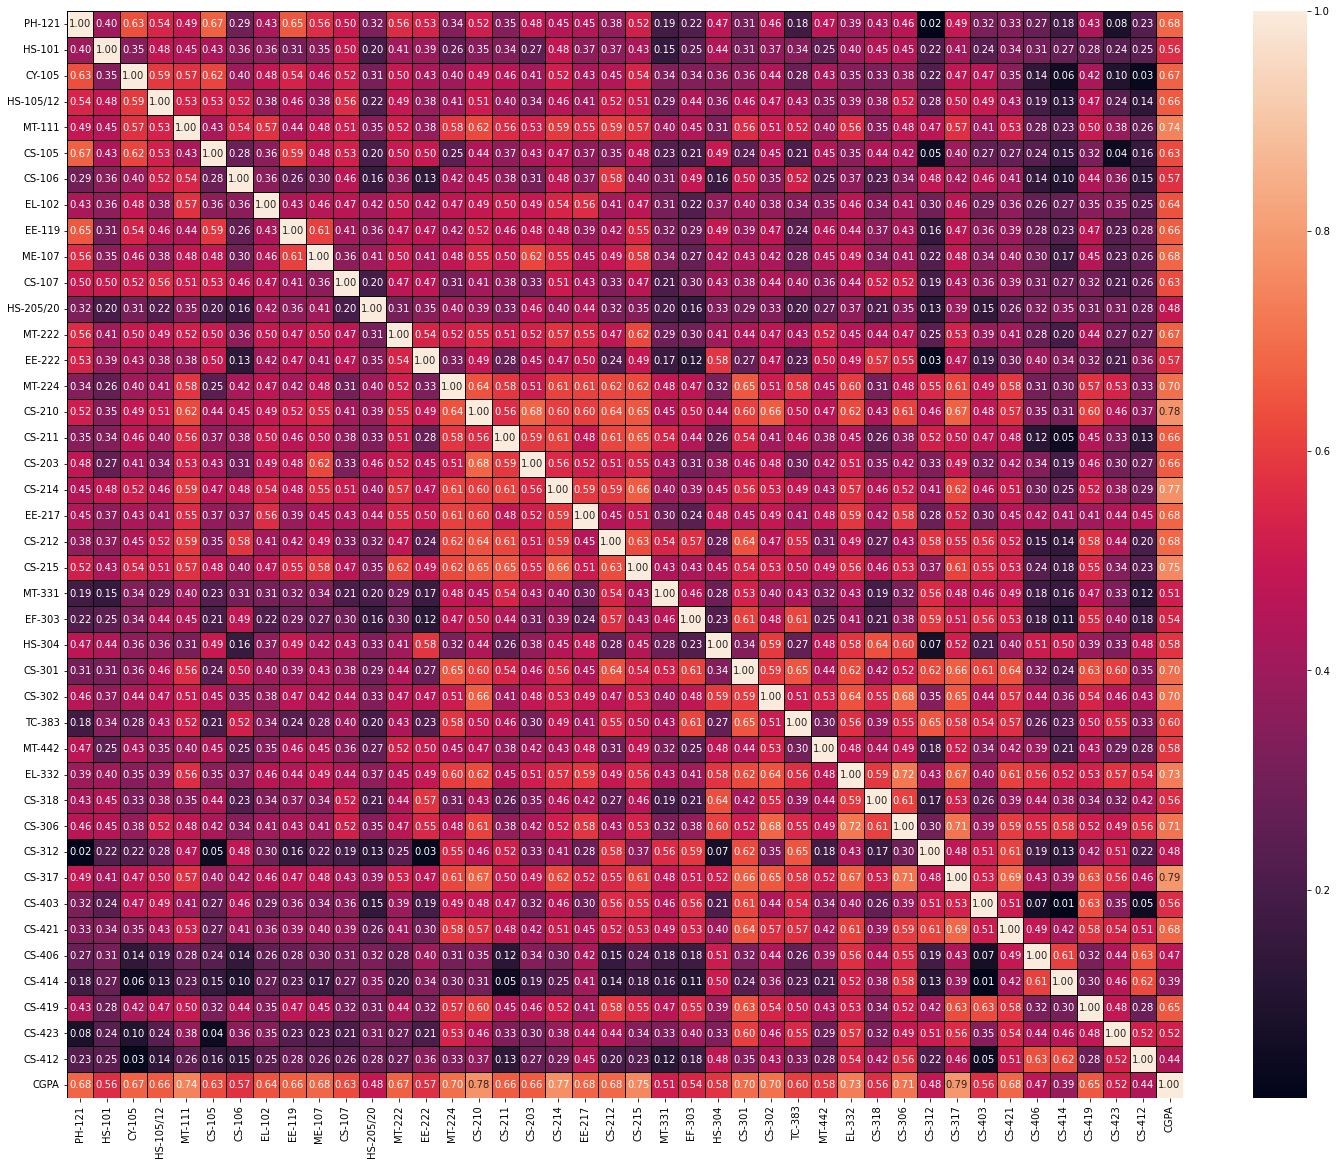

In [276]:
# let's check correlation using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_i.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')

- All features are positivly correlated with CGPA.
- maximum correlation : CS-210
- minimum correlation : CS-414

## Divide the dataset in four parts

#### First year data

In [277]:
year1 = df_i.iloc[:,:11]
year1['CGPA'] = df_i['CGPA']
year1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0,2.193


### 2nd year data

In [278]:
year2 = df_i.iloc[:,11:22]
year2['CGPA'] = df_i['CGPA']
year2

,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,3.4,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.205
1,2.4,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0,2.008
2,3.7,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,3.608
3,3.0,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0,1.906
4,4.0,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...
566,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7,3.798
567,3.4,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.772
568,2.7,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0,3.470
569,2.4,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4,2.193


### 3rd year data

In [279]:
year3=df_i.iloc[:,22:34]
year3['CGPA'] = df_i['CGPA']
year3

,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.0,1.7,2.4,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,2.205
1,1.4,1.0,1.7,3.7,1.4,1.7,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,2.4,4.0,3.4,3.7,3.0,4.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.4,1.0,2.7,1.0,2.7,1.4,1.7,1.4,3.4,1.7,1.4,2.0,1.906
4,2.4,1.7,3.7,2.7,3.7,2.4,3.7,3.7,2.7,3.7,2.7,3.4,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4.0,3.0,3.7,3.7,4.0,4.0,4.0,4.0,4.0,3.4,3.7,3.7,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4,3.772
568,4.0,3.0,2.7,3.4,3.4,4.0,3.4,3.0,2.4,3.4,3.7,3.0,3.470
569,2.4,1.0,2.0,2.0,2.4,1.7,1.7,1.0,2.7,3.4,1.0,3.0,2.193


### 4th year data

In [280]:
year4 = df_i.iloc[:,34:41]
year4['CGPA'] = df_i['CGPA']
year4

,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...
566,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
567,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
569,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


# EDA

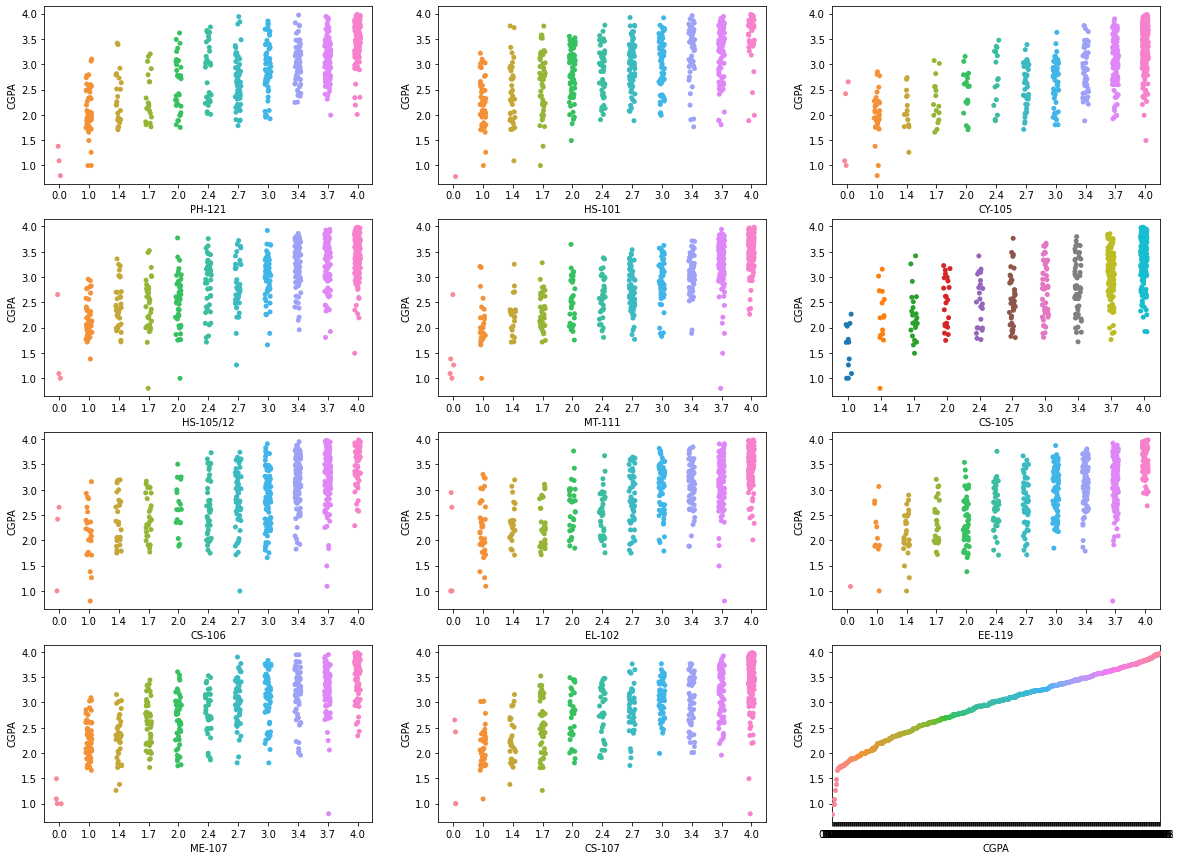

In [286]:
# visualize the relationship using scatter plot for year1 students
plt.figure(figsize=(20,15))
pn = 1
for col in year1:
    if pn <= 12:
        ax = plt.subplot(4,3,pn)
        sns.stripplot(year1[col],year1['CGPA'])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('CGPA',fontsize = 10)
    pn +=1
plt.show()    

### we can clearly see the all columns are equally distributed 

<AxesSubplot:>

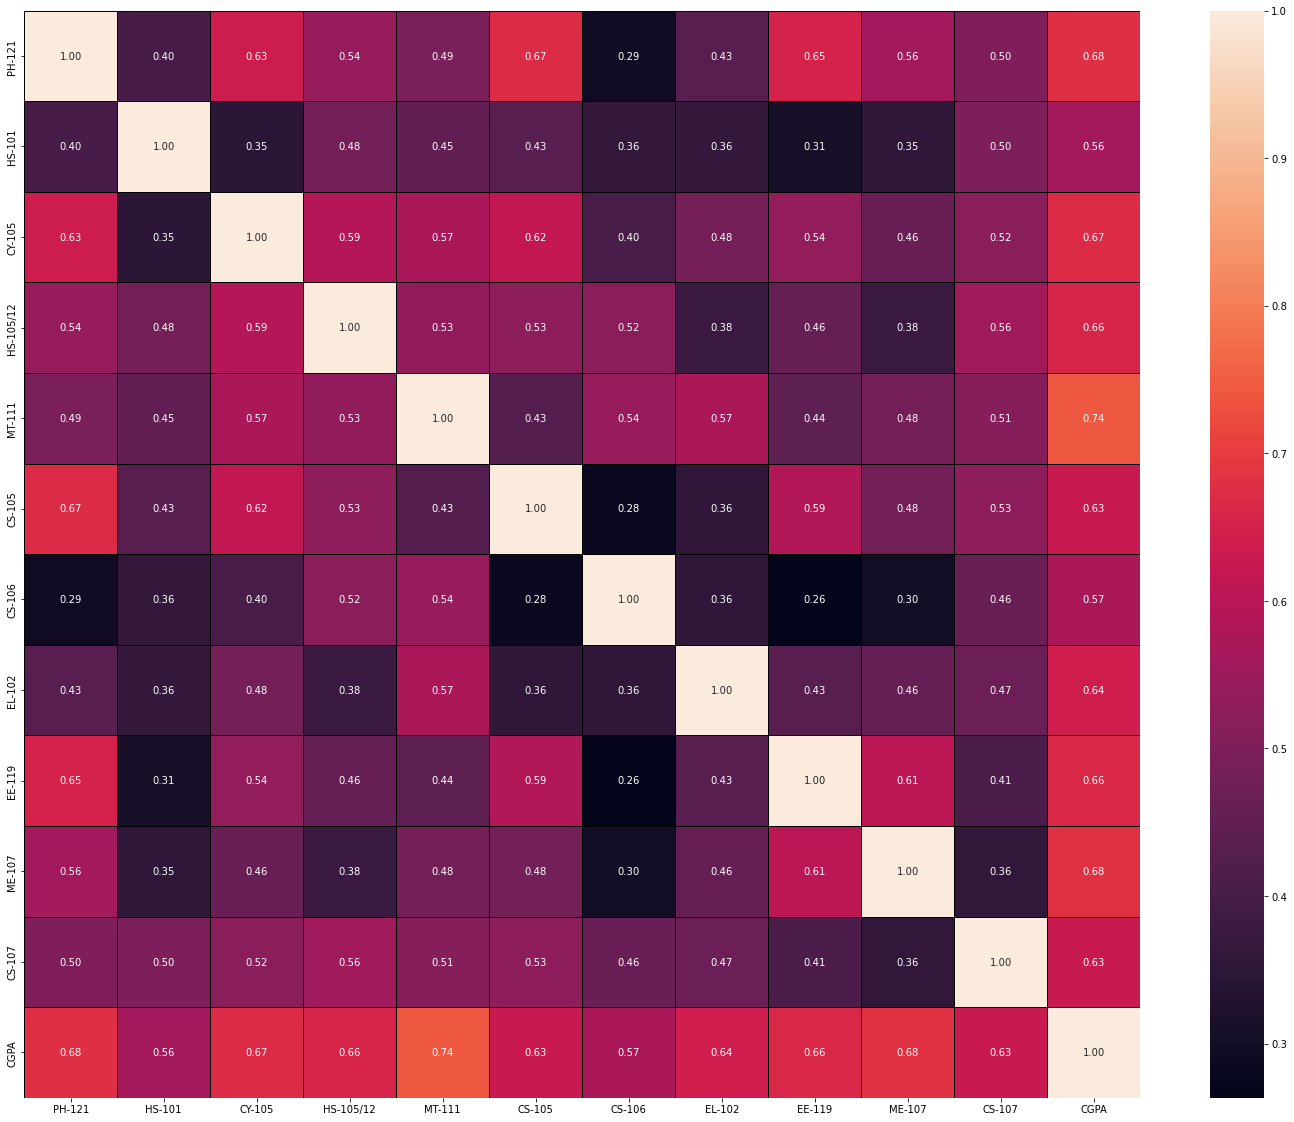

In [287]:
# let's check the correlation of year1 with CGPA using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(year1.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')


### all columns are positively correlated with CGPA

## Visualize the 2nd year data

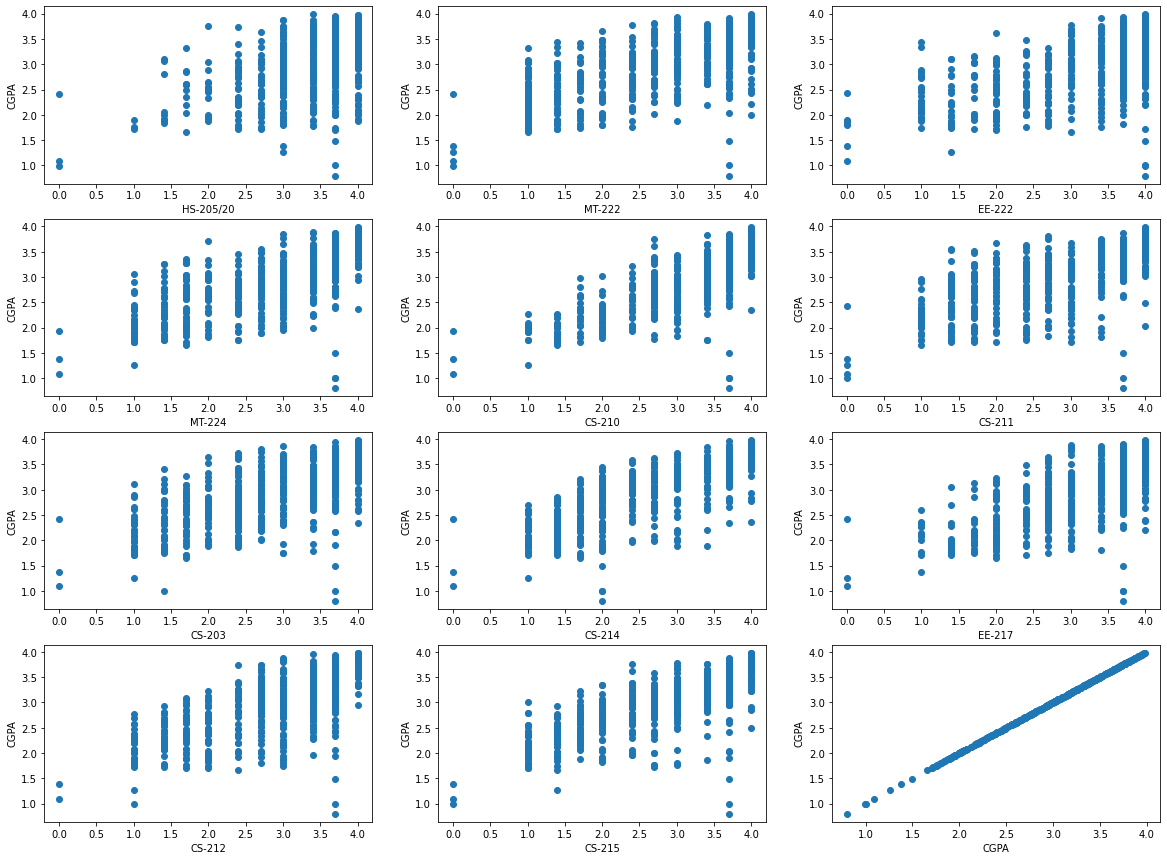

In [282]:
# visualize the relationship using scatter plot for year2 students
plt.figure(figsize=(20,15))
pn = 1
for col in year2:
    if pn <= 12:
        ax = plt.subplot(4,3,pn)
        plt.scatter(year2[col],year2['CGPA'])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('CGPA',fontsize = 10)
    pn +=1
plt.show()    

### We can clearly see the all columns are equally distributed

<AxesSubplot:>

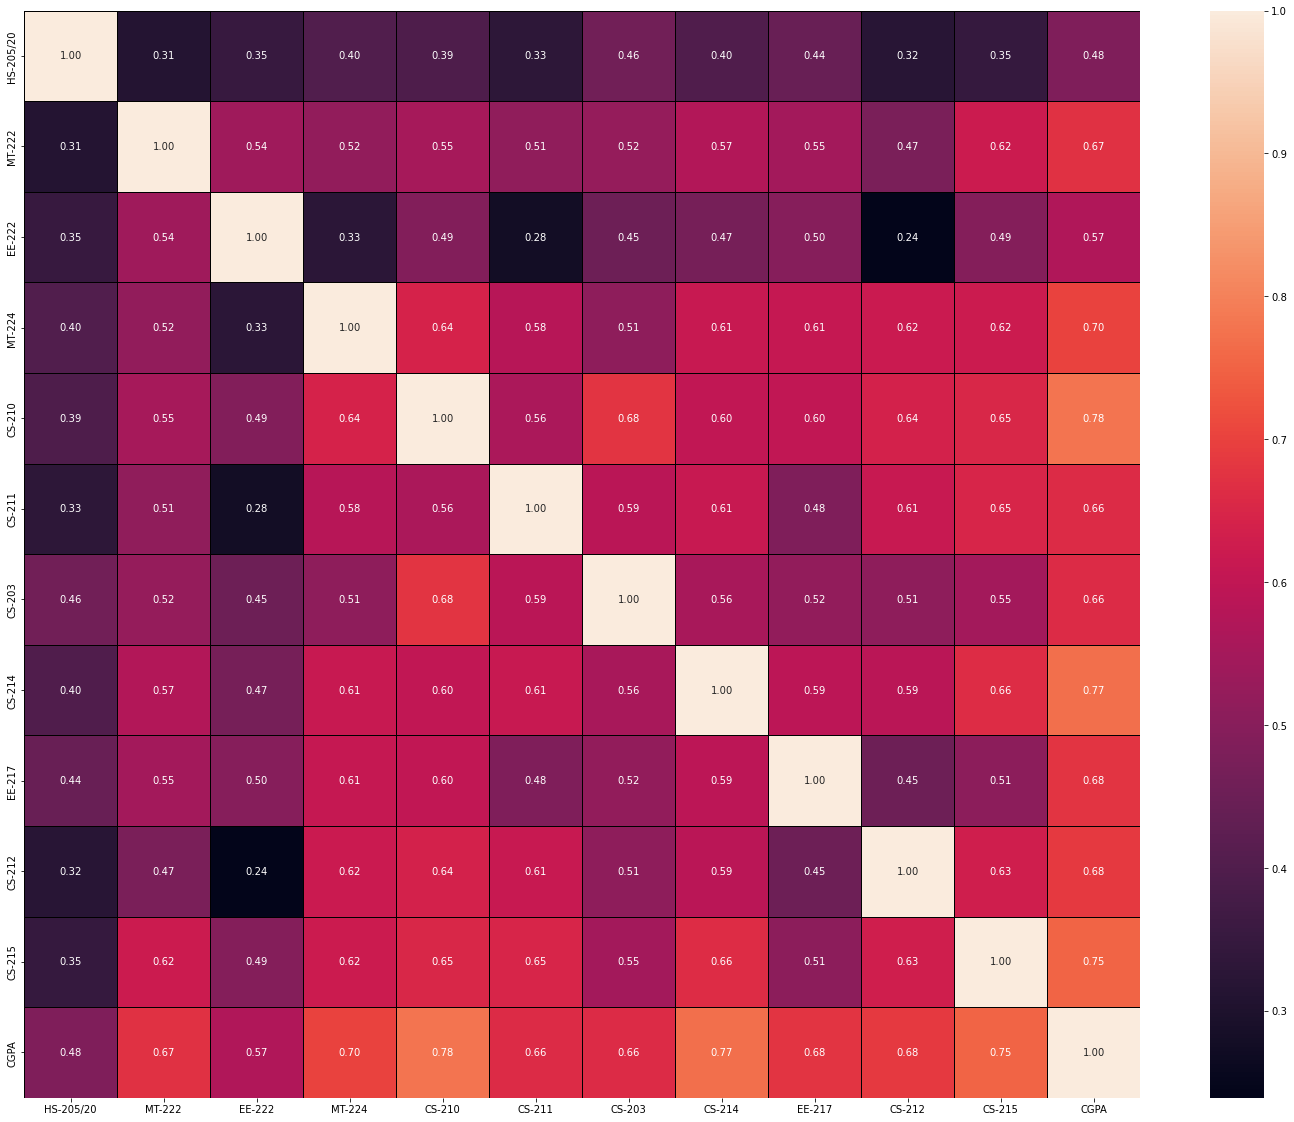

In [289]:
# let's check the correlation of year2 with CGPA using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(year2.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')


### all columns are positively correlated with CGPA

## Visualize the third year data

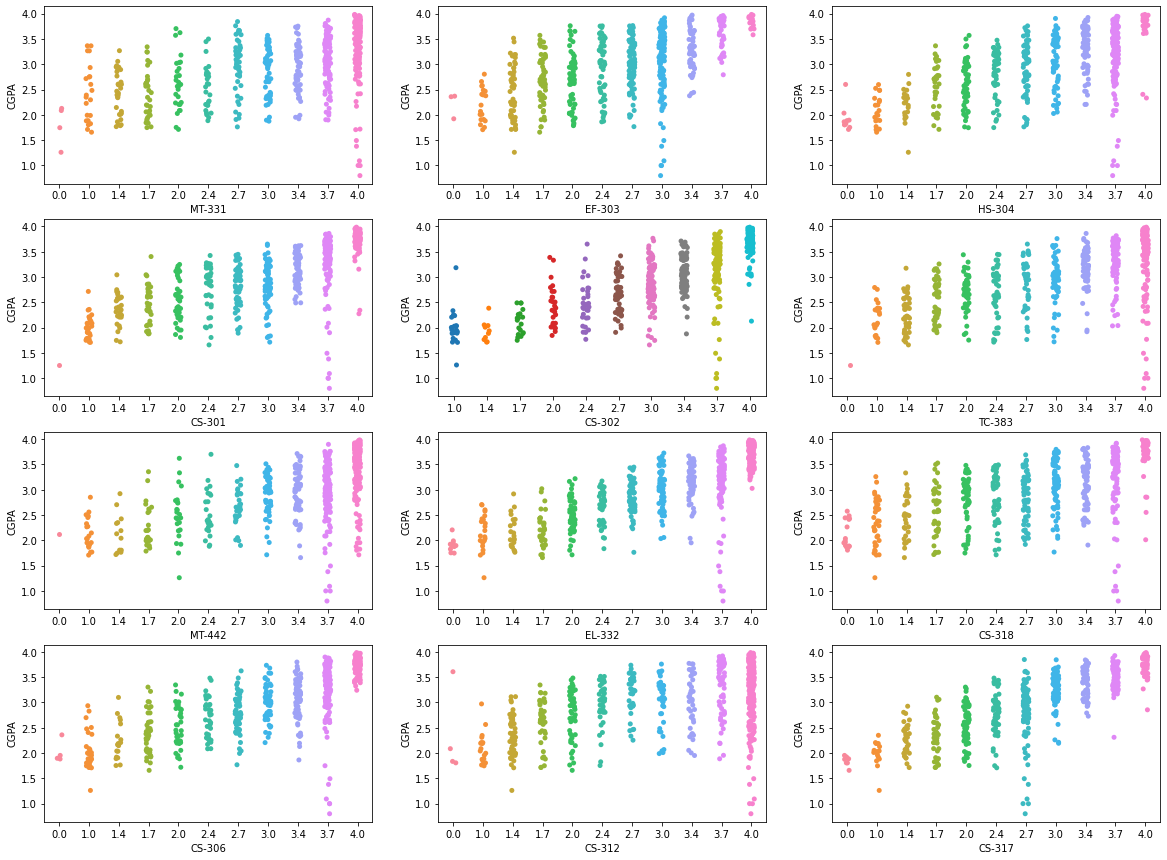

In [288]:
# visualize the relationship using scatter plot for year3 students
plt.figure(figsize=(20,15))
pn = 1
for col in year3:
    if pn <= 12:
        ax = plt.subplot(4,3,pn)
        sns.stripplot(year3[col],year1['CGPA'])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('CGPA',fontsize = 10)
    pn +=1
plt.show()    

### All columns are equally distributed

<AxesSubplot:>

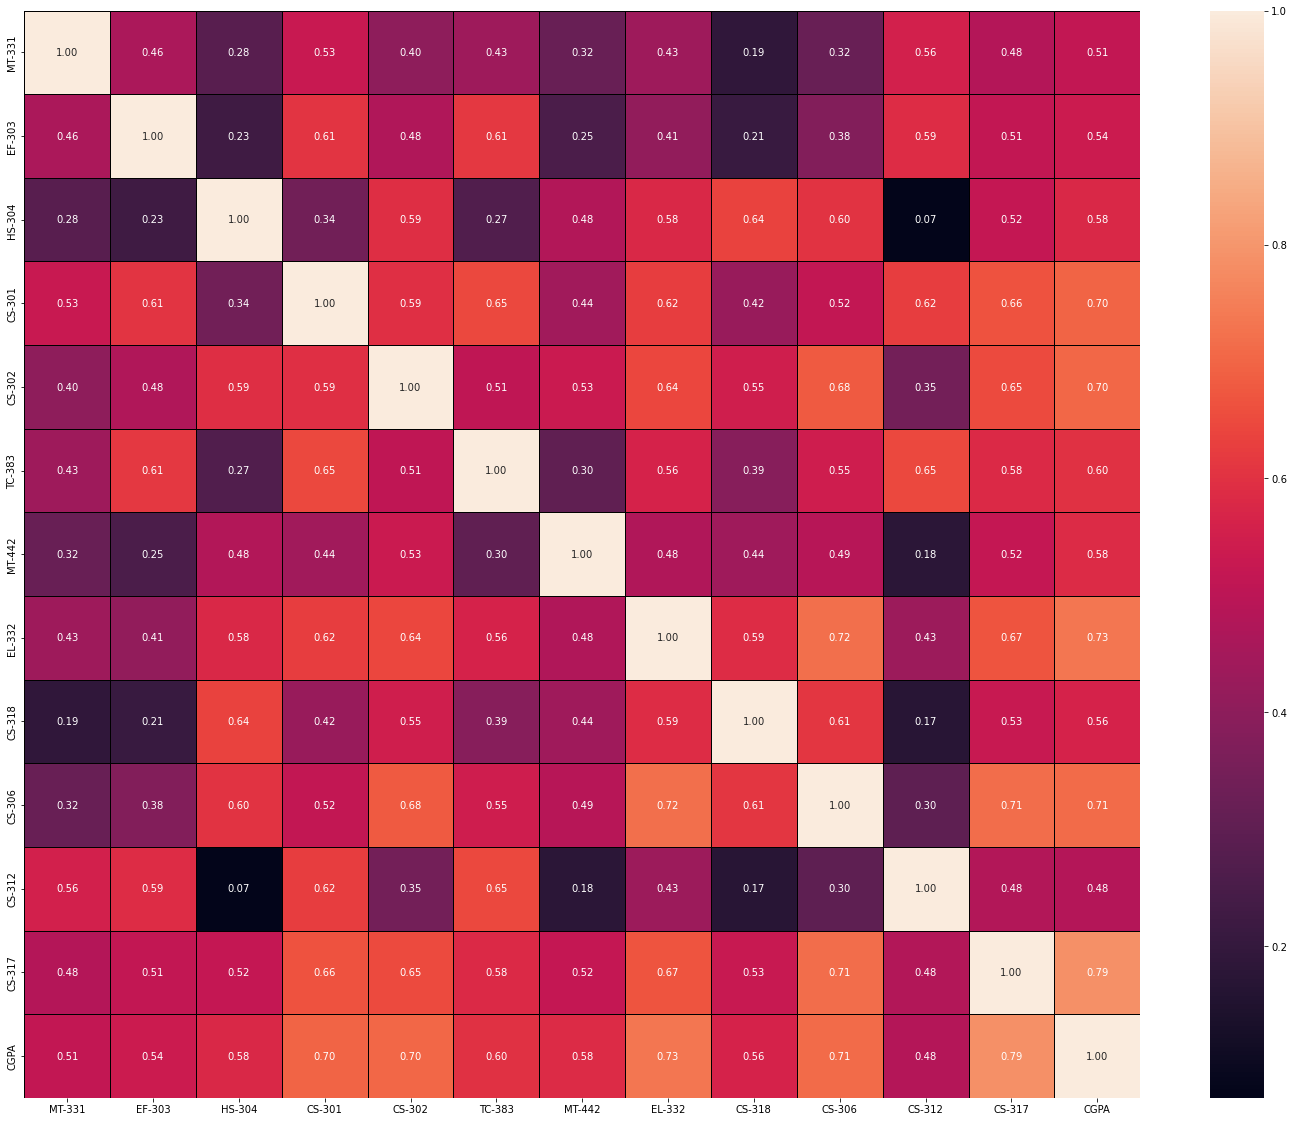

In [291]:
# let's check the correlation of year3 with CGPA using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(year3.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')


### All columns are positively correlated with CGPA

## Visualize the fourth year data

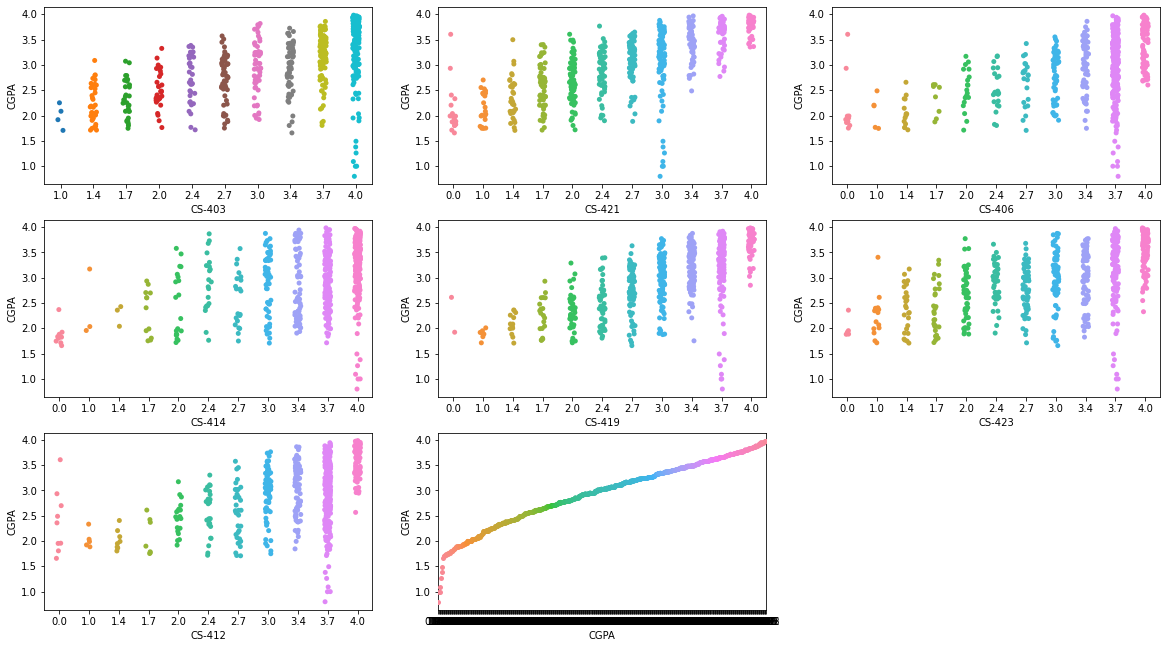

In [285]:
# visualize the relationship using scatter plot for year4 students
plt.figure(figsize=(20,15))
pn = 1
for col in year4:
    if pn <= 12:
        ax = plt.subplot(4,3,pn)
        sns.stripplot(year4[col],year4['CGPA'])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('CGPA',fontsize = 10)
    pn +=1
plt.show()    

### WE can clerly see all columns are equally distributed

<AxesSubplot:>

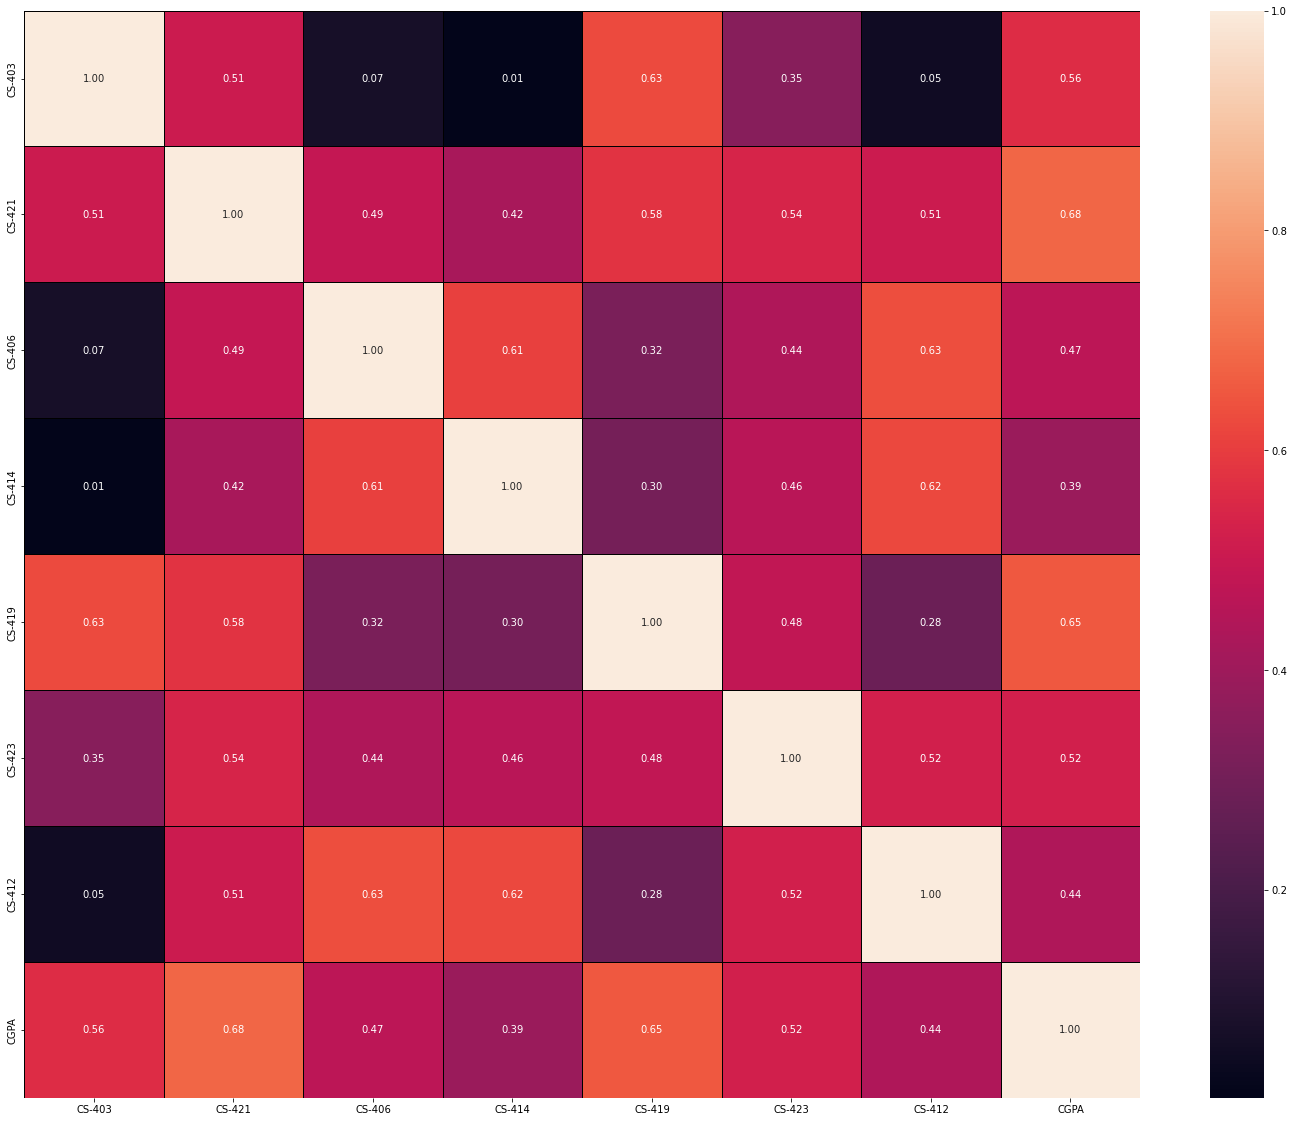

In [290]:
# let's check the correlation of year4 with CGPA using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(year4.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')


### All columns are positively correlated with CGPA

## Outliers checking


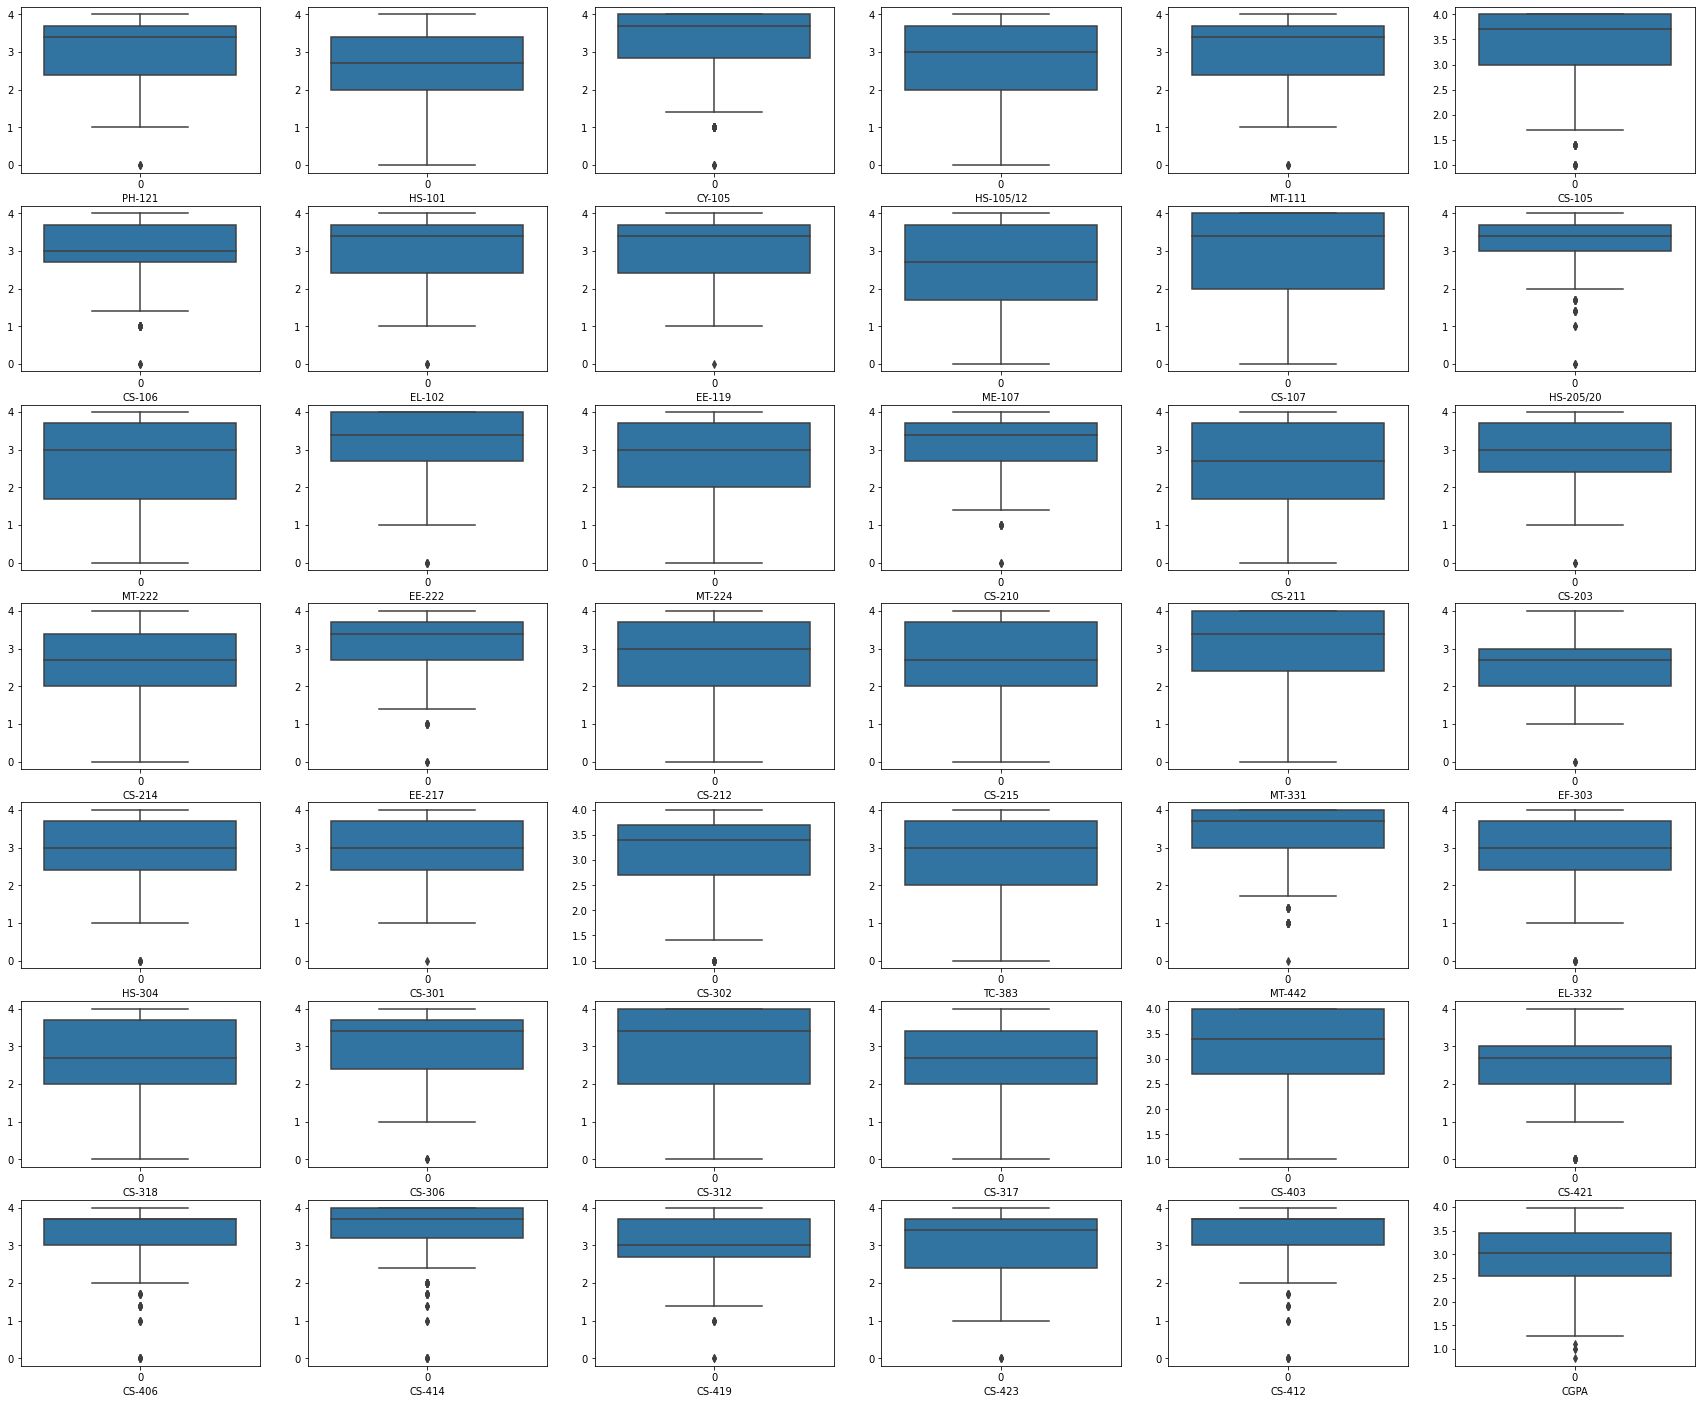

In [294]:
plt.figure(figsize=(30,25))
pn = 1
for col in df_i:
    if pn <= 42:
        ax = plt.subplot(7,6,pn)
        sns.boxplot(data=df_i[col])
        plt.xlabel(col,fontsize = 10)
    
    pn +=1
plt.show()    

#### All columns are having categorical data so we can remove these outliers

## Normal Distribution curve for every individual column

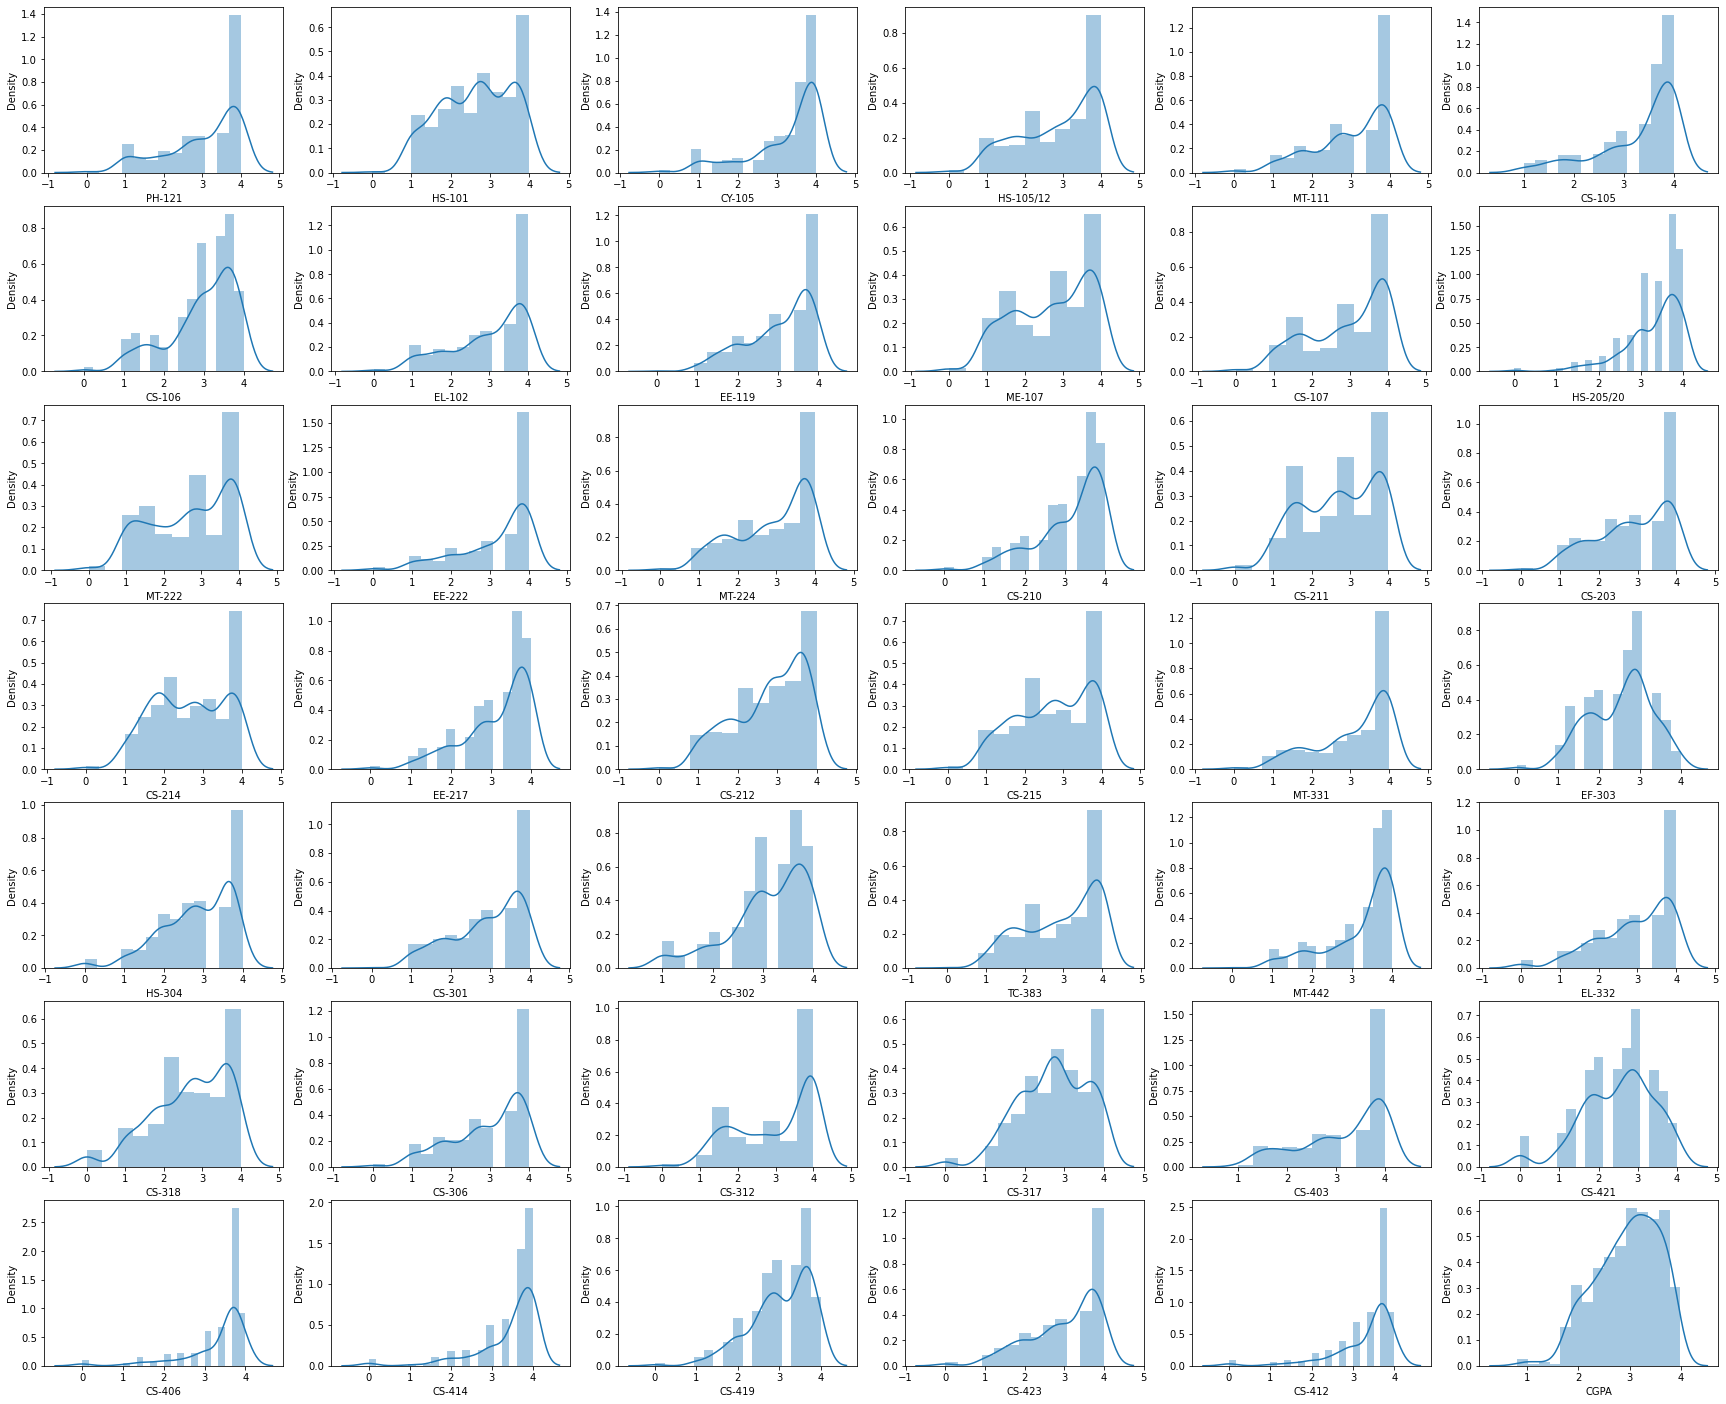

In [296]:
plt.figure(figsize=(30,25))
pn = 1
for col in df_i:
    if pn <= 42:
        ax = plt.subplot(7,6,pn)
        sns.distplot(df_i[col])
        plt.xlabel(col,fontsize = 10)
    
    pn +=1
plt.show()    

### All columns are normally distributed

### Dividing data in features and label

In [297]:
x = df_i.drop('CGPA',axis = 1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [298]:
y = df_i['CGPA']
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [301]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-0.32798474, -1.35341922, -1.70136198, ..., -1.82298415,
         0.00338497,  0.52596269],
       [ 1.01119609, -1.79413913, -2.02652465, ..., -1.41721857,
        -1.13356694, -0.40879626],
       [ 1.01119609,  0.40946045,  0.79155187, ...,  1.28788524,
         0.79925131,  0.92657368],
       ...,
       [-0.01894301,  1.51126024,  0.4663892 , ...,  0.4763541 ,
         0.79925131,  0.52596269],
       [ 1.01119609,  0.85018036, -2.46007489, ..., -0.06466667,
        -0.3377006 , -1.7441662 ],
       [-1.04908212, -1.79413913, -2.46007489, ...,  0.4763541 ,
        -2.27051884, -2.14477718]])

## Best Random State


In [339]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i) 
    ada= AdaBoostRegressor()
    ada.fit(x_train,y_train)
    y_pred = ada.predict(x_train)
    score1 = r2_score(y_train,y_pred)
    pred = ada.predict(x_test)
    score=r2_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('testing score',score,'random state',i)
    

training score 0.9349988573336674 testing score 0.9022096212556733 random state 1
testing score 0.9022096212556733 random state 1
training score 0.9427217563732829 testing score 0.9201198456209714 random state 2
testing score 0.9201198456209714 random state 2
training score 0.9350707721834162 testing score 0.905719534054386 random state 3
testing score 0.905719534054386 random state 3
training score 0.936238925433436 testing score 0.86915198561342 random state 4
testing score 0.86915198561342 random state 4
training score 0.9416988995175679 testing score 0.9113923938170636 random state 5
testing score 0.9113923938170636 random state 5
training score 0.9414745273049977 testing score 0.9036774830524941 random state 6
testing score 0.9036774830524941 random state 6
training score 0.9404709166884824 testing score 0.8994944501404105 random state 7
testing score 0.8994944501404105 random state 7
training score 0.9349834479105106 testing score 0.9256671182278228 random state 8
testing score 0

## Train Test Split

In [346]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 40)


##  Model building using Linear Regression


In [347]:
# creating object for LinearRegression model
lr = LinearRegression()
lr.fit(x_train,y_train)
# let's check how well model fit on train data
lr.score(x_train,y_train)
# let's check how well model fits on test data
lr.score(x_test,y_test)
# predict the training score
x_pred=lr.predict(x_train)
print("Traing score of Linear Regression",r2_score(y_train,x_pred))
# predict the model
y_pred = lr.predict(x_test)
print("Testing score of linear Regression",r2_score(y_test,y_pred))

Traing score of Linear Regression 0.943502988208338
Testing score of linear Regression 0.9469730924101589


### After setting the random state = 40 , We got the accuracy score is 94%

## Cross validation for LinearRegression

In [348]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.948548256722298


### Difference between model accuracy and cross validation accuracy score is 0.2

### Lets check overall error of Model using MAE,MSE,RMSE

In [349]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(0.017255604338027627))

Mean Absolute Error is===== 0.09542836895661114
Mean squared error is====== 0.017255604338027627
Root mean squared error=== 0.1313605889832549


##  Model building using Random Forest

In [350]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 4)


In [351]:
from sklearn.ensemble import RandomForestRegressor
# initiate the object for random forest
rf = RandomForestRegressor()
# model training
rf.fit(x_train,y_train)
print("Training score without hyperparameter tuning is======",rf.score(x_train,y_train))
pred = rf.predict(x_test)
print("testing score without hyperparameter tuning is======",r2_score(y_test,pred))

Training score without hyperparameter tuning is====== 0.9879068455825213
testing score without hyperparameter tuning is====== 0.9692757316000088


### After setting the random state = 4 , We got the accuracy score is 96%

## Cross validation for RandomForest

In [352]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9636293911341852


### Difference between model accuracy and cross validation accuracy score is 0.4

### Lets check overall error of Model using MAE,MSE,RMSE

In [353]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,pred))
print("Mean squared error is======",mean_squared_error(y_test,pred))
print("Root mean squared error===",np.sqrt(0.010851399308695657))

Mean Absolute Error is===== 0.07414460869565218
Mean squared error is====== 0.010225069433913008
Root mean squared error=== 0.10417004996012845


## Model building using KNN Regressor


In [354]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 177)


In [355]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor
# creating object for knn algorithm
knn = KNeighborsRegressor()
# model training
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
r2_score(y_test,y_pred)
print("Training score without Hyperparameter tuning is====",knn.score(x_train,y_train))
print("Testing score without Hyperparameter Tuning is =====",knn.score(x_test,y_test))

Training score without Hyperparameter tuning is==== 0.9553093534800241
Testing score without Hyperparameter Tuning is ===== 0.7376990002263727


### After setting the random state = 177 , We got the accuracy score is 73%


## Cross validation for KNN

In [356]:
Lassocv=LassoCV(max_iter=100,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.811310400350117


### Difference between model accuracy and cross validation accuracy score is 8


### Lets check overall error of Model using MAE,MSE,RMSE

In [357]:
##Printing all evaluation score for KNNRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(0.10589930295652171))

Mean Absolute Error is===== 0.11888347826086956
Mean squared error is====== 0.10589930295652171
Root mean squared error=== 0.32542173092238585


## Model Building using ADA Boost Regressor


In [358]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 8)


In [359]:
from sklearn.ensemble import AdaBoostRegressor
#creating object for AdaBoostRegressor###
ada= AdaBoostRegressor()
# model training
ada.fit(x_train,y_train)
#Predicting values in x_train for comparing with y_train
x_pred= ada.predict(x_train)
# r2 score on training data
print("Training score of Ada bosst",r2_score(y_train,x_pred))
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)
###Testing score using Ada Boost Regressor#####
print("Testing score of Ada boost",r2_score(y_test,y_pred))

Training score of Ada bosst 0.9363020497318462
Testing score of Ada boost 0.9201026095634781


### After setting the random state = 8 , We got the accuracy score is 92%


## Cross validation for Ada Boost

In [360]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
print('Testing score',lasso_reg.score(x_test,y_test))

Testing score 0.9399859303975499


### Difference between model accuracy and cross validation accuracy score is 1.5


### Lets check overall error of Model using MAE,MSE,RMSE

In [361]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(0.0290745500685638))

Mean Absolute Error is===== 0.14630596217208267
Mean squared error is====== 0.0305537386574651
Root mean squared error=== 0.17051260970545198


# as per my observation , Linear Regression is best and model accuracy and cross val score difference  is also least

## HYPERPARAMETER TUNING

In [362]:
lr = LinearRegression()

In [363]:
params = {'n_jobs':[20],
         'copy_X':[True,False],
         'fit_intercept':[True,False],
         'normalize':['deprecated']}

In [364]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [20],
                         'normalize': ['deprecated']})

In [365]:
lr = grd.best_estimator_
lr.fit(x_train,y_train)

LinearRegression(fit_intercept=False, n_jobs=20)

In [367]:
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.939988392993438

# save the final model

In [368]:
import pickle
pickle.dump(lr,open('Students grades','wb'))

In [370]:
import joblib
joblib.dump(lr,'students grades.pkl')

['students grades.pkl']